# Aim

 - Minimise the Crest factor of the multisine signal through optimising the phase value for each sine signal

# Imports

In [1]:
# numpy
import numpy as np
# pandas
import pandas as pd
# seaborn
import seaborn as sns
# matplotlib
import matplotlib.pyplot as plt
import matplotlib
# scipy
import scipy.optimize as optimize

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

# Generating Data

Raw Data

In [2]:
# frequency
frequency = np.array([1, 1.512097, 2.372217, 3.75601, 5.978954, 9.450605, 15.02404, 23.91582, 38.42213, 60.09615, 95.0169,
                      150.2404, 237.7717, 376.6741, 600]).reshape(15,1)

# omega
omega = 2 * np.pi * frequency

# amplitude
amplitude = 0.32

# seed
np.random.seed(942834983)
# array of zero phases
zero_phases = np.zeros(15)

# time
time = np.linspace(start=0, stop=1, num=10001).reshape(10001,1)

Function to Generate Sine Signal

In [3]:
def sine_signal(amplitude:float=None, frequency:float=None, phase:float=None, time:np.ndarray = None)->np.ndarray:
    '''

    Generates a sine signal
    
    Parameters:
    -----------
    
    amplitude : float
        Amplitude of the signal
        
    frequency : array_like
        Array containing frequencies for each sine signal
    
    phases: array_like
        Array containing initial phases for each sine signal
        
    time: array_like
        Array containing the time range for the signal
        
    Return:
    -------
    sine : array_like
        Sine signal
    '''

    omega = 2 * np.pi * frequency
    
    sine = amplitude * np.sin(omega * time + np.full((time.shape[0],1), phase)).flatten()
    
    return sine

Generating Sine Signals

In [4]:
# storing data
data ={}
# generating the 15 sine signals
for i in range(len(frequency)):
    data[frequency[i].item()] = sine_signal(amplitude, frequency[i], zero_phases[i], time)

Displaying Data

In [5]:
# observing the sine signals
data = pd.DataFrame(data)
data

,1.000000,1.512097,2.372217,3.756010,5.978954,9.450605,15.024040,23.915820,38.422130,60.096150,95.016900,150.240400,237.771700,376.674100,600.000000
0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,2.010619e-04,0.000304,0.000477,0.000755,0.001202,0.001900,0.003021,0.004808,0.007724,0.012080,0.019093,0.030163,0.047629,0.075030,1.177999e-01
2,4.021238e-04,0.000608,0.000954,0.001510,0.002404,0.003800,0.006041,0.009616,0.015444,0.024143,0.038118,0.060057,0.094197,0.145876,2.190551e-01
3,6.031854e-04,0.000912,0.001431,0.002266,0.003606,0.005700,0.009061,0.014421,0.023155,0.036172,0.057007,0.089416,0.138667,0.208590,2.895447e-01
4,8.042469e-04,0.001216,0.001908,0.003021,0.004808,0.007600,0.012080,0.019223,0.030853,0.048149,0.075693,0.117980,0.180047,0.259675,3.193686e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,-8.042469e-04,-0.023086,0.231517,-0.319872,-0.046954,0.104937,0.036175,-0.177776,0.176927,0.140079,-0.042313,0.289804,-0.286560,-0.046940,-3.193686e-01
9997,-6.031854e-04,-0.023390,0.231188,-0.319849,-0.045764,0.103140,0.039174,-0.173758,0.170439,0.150840,-0.023313,0.301305,-0.304566,-0.119849,-2.895447e-01
9998,-4.021238e-04,-0.023693,0.230858,-0.319825,-0.044574,0.101340,0.042171,-0.169701,0.163852,0.161387,-0.004229,0.310122,-0.315787,-0.186077,-2.190551e-01
9999,-2.010619e-04,-0.023996,0.230527,-0.319799,-0.043384,0.099535,0.045163,-0.165605,0.157169,0.171703,0.014870,0.316178,-0.319973,-0.241931,-1.177999e-01


# Visualising the Data

## Individual Sine Signals

In [6]:
def signif(x, sig=2):
    if(np.abs(x)<np.finfo(float).tiny): return 0.0
    return np.around(x, sig-int(np.floor(np.log10(abs(x))))-1)

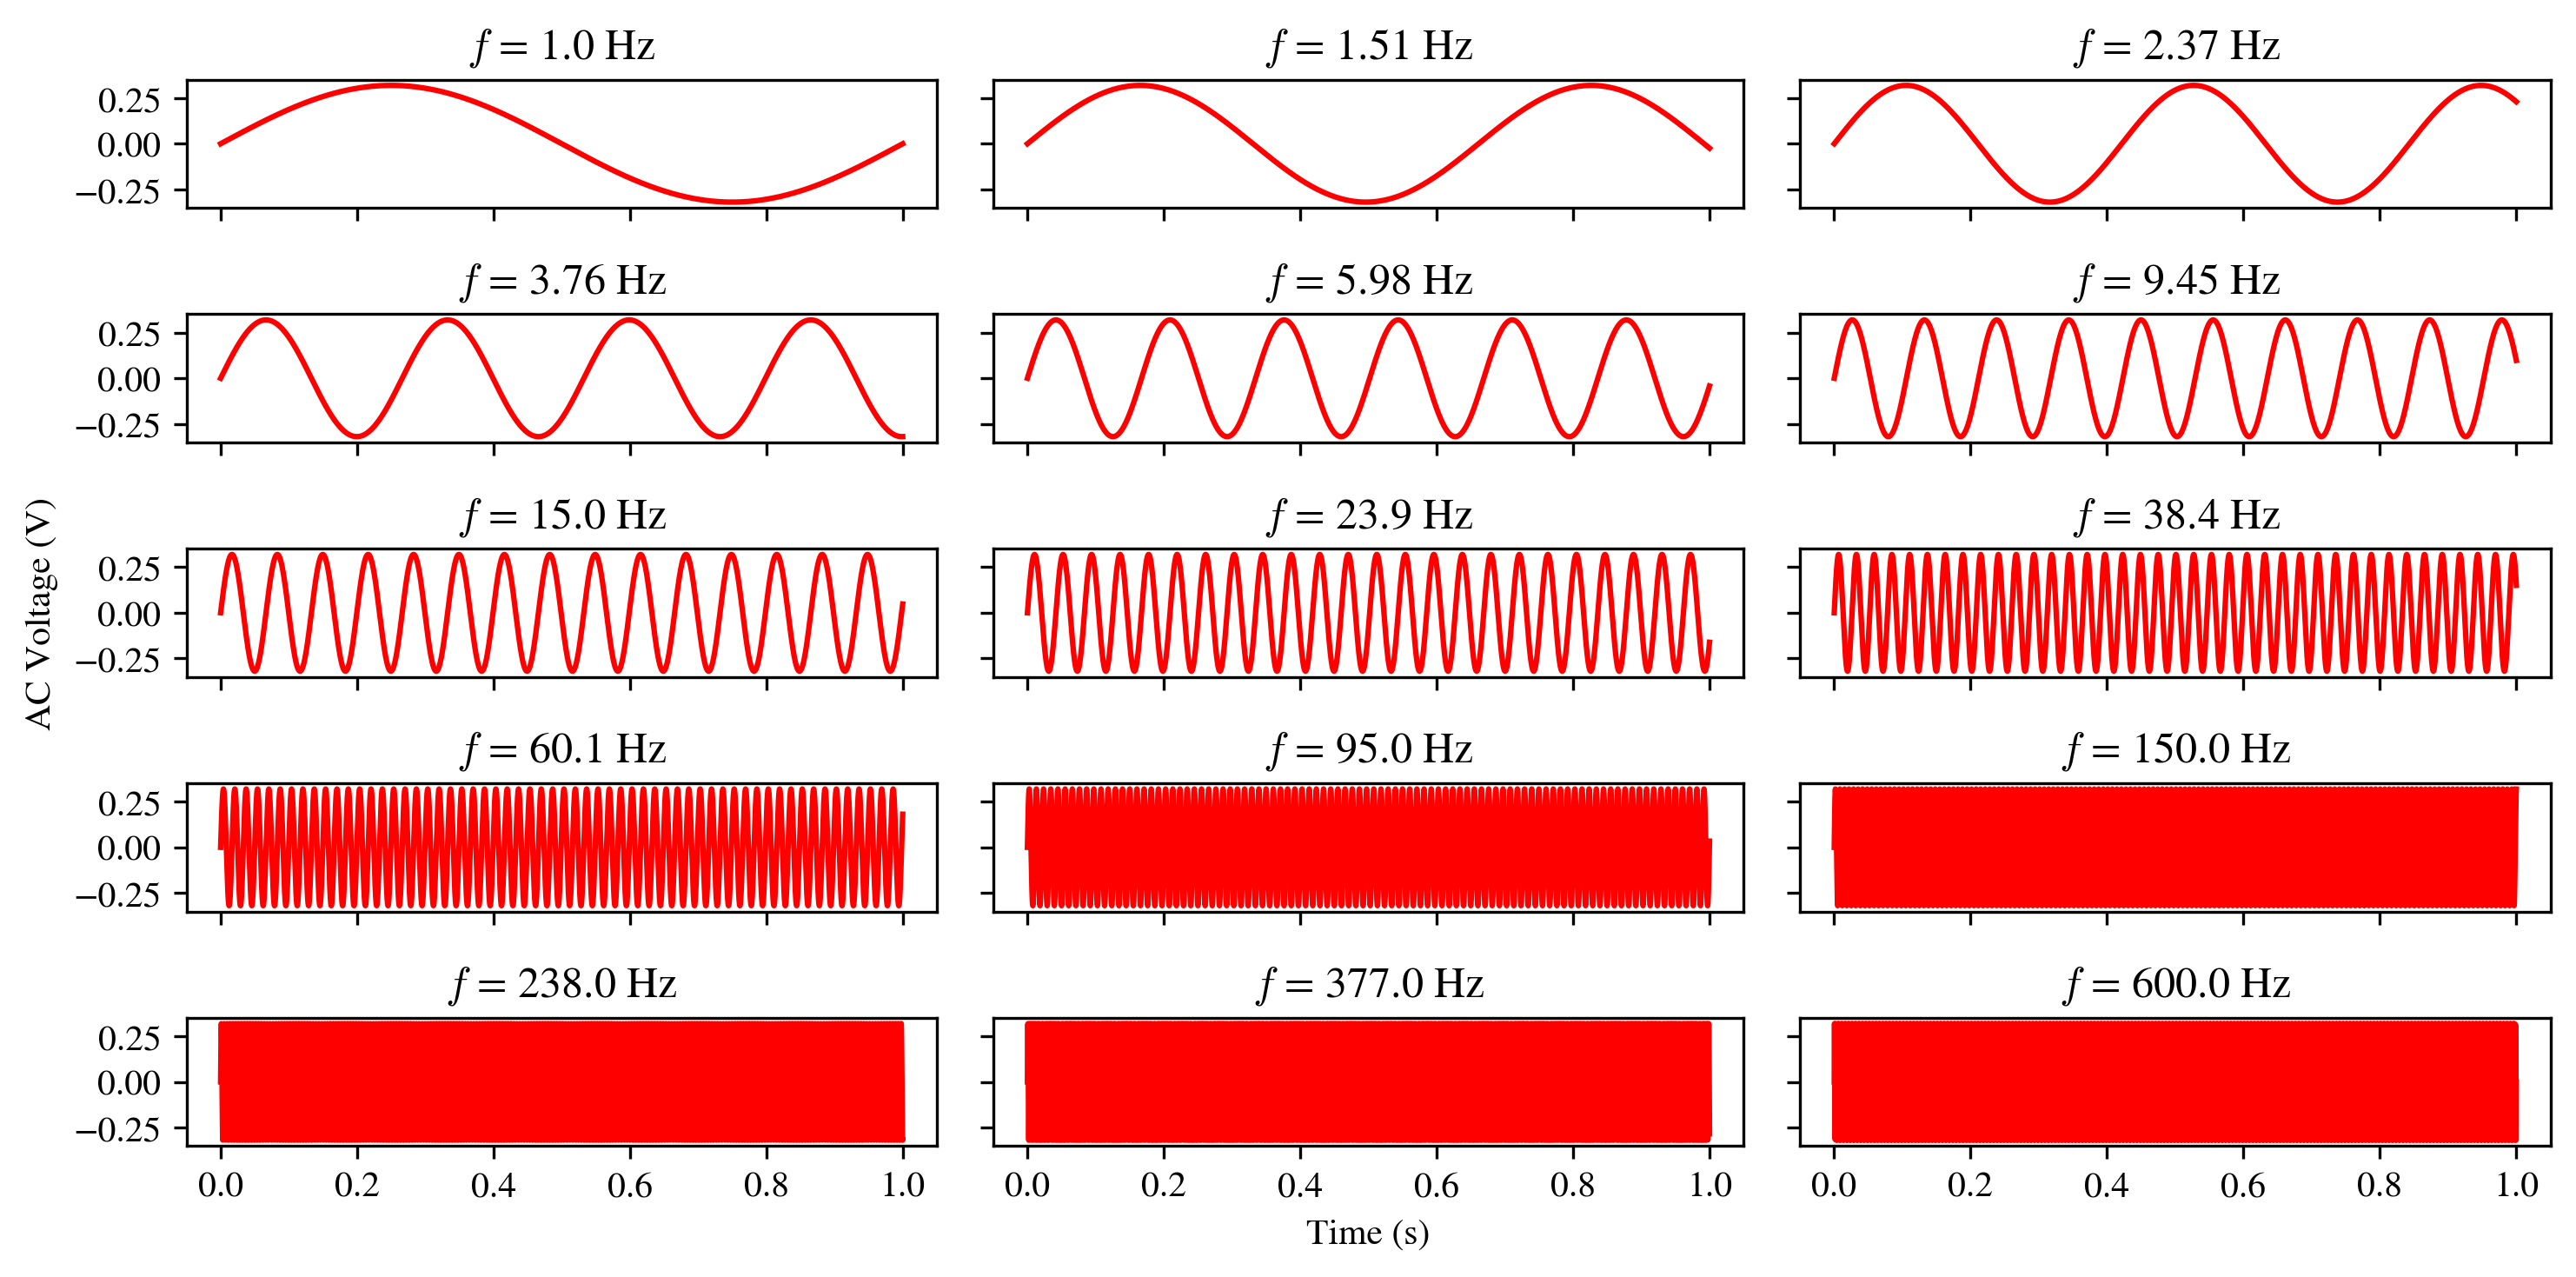

In [7]:
# figure setup
fig, axs = plt.subplots(5, 3, figsize=(10, 5), sharex=True, sharey=True, dpi=300)
axs = np.array(axs)

for i, ax in enumerate(axs.reshape(-1)):
    # sine plot
    sns.lineplot(x=time.flatten(), y=data.iloc[:, i], ax=ax, color='red')
    # title
    ax.set_title(fr'$f$ = {signif(data.columns[i], 3)} Hz')
    # axis labels
    ax.set_ylabel('')
    ax.set_xlabel('')
    
# labels
axs[2, 0].set_ylabel('AC Voltage (V)')
axs[4, 1].set_xlabel('Time (s)')

plt.tight_layout()
plt.show()

## Multisine Excitation Signal

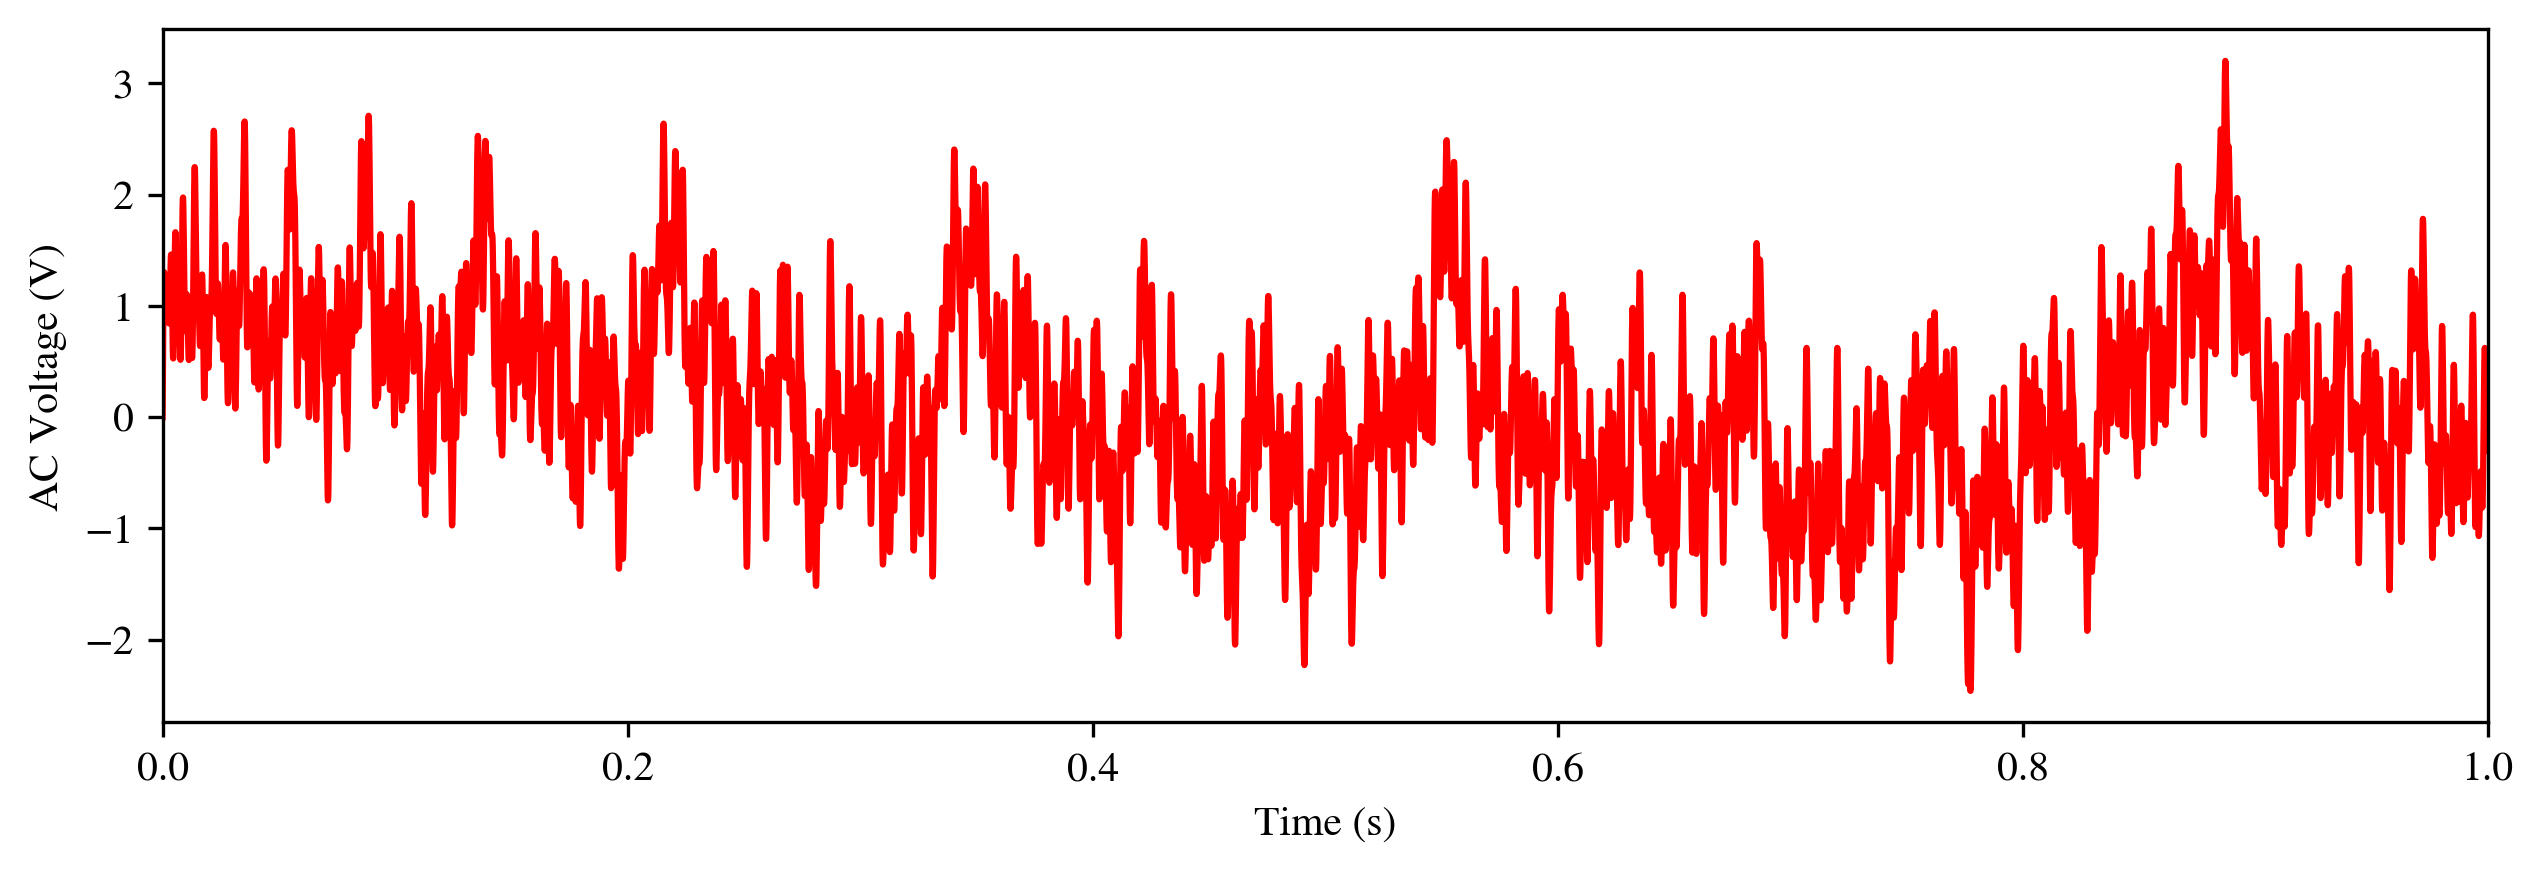

In [8]:
# generating multisine signal using zero phases
multisine = 0
for i in range(len(frequency)):
               
    # sine signal for zero phase
    multisine += sine_signal(amplitude, frequency[i], zero_phases[i], time)

# figure set up
plt.figure(figsize=(10, 3), dpi=300)

# axis labels
plt.xlabel('Time (s)')
plt.ylabel('AC Voltage (V)')

# line plot
plt.plot(time, multisine, color='red')
plt.xlim(0,1)

plt.show()

# Optimisation

Crest Factor Function

In [9]:
def crest_factor(phases:np.ndarray=None)->float:
    '''
    
    Calculates crest factor
    
    Parameters:
    -----------
    
    sine_signals : array_like
        Array containing sine signals
    
    phases: array_like
        Array containing initial phases for each sine signal
        
    Return:
    -------
    cf : float
        Crest factor
    '''
    
    # Compute the sum of the sine signals with the given phases
    multisine_signal = 0
    for i in range(len(phases)):
        multisine_signal += sine_signal(amplitude, frequency[i], phases[i], time)
    
    # Compute the peak value of the multisine signal
    peak_value = np.max(np.abs(multisine_signal))
    
    # Compute the rms value of the multisine signal
    rms_value = ( (multisine_signal**2).sum() / len(multisine_signal) )**0.5
    
    # Crest factor
    cf = peak_value / rms_value
    
    # Return the crest factor
    return cf

Random Initial Phases

In [10]:
# random initial phases
np.random.seed(942834983)
initial_phases = np.random.uniform(low=0, high=2*np.pi, size=(100,15))

### Powell Algorithm

In [11]:
powell_optimum_solution = float('inf')
powell_optimum_info = 0

# looping through each initial random phase array
for i in range(initial_phases.shape[0]):
    
    # powell optimisation
    powell_optimum = optimize.minimize(fun=crest_factor, x0=initial_phases[i], 
                                bounds=[(0, 2*np.pi) for i in range(initial_phases.shape[1])],
                                method = 'Powell'
                               )
    
    # storing best results i.e phases that result in the smallest crest factor
    if powell_optimum.fun < powell_optimum_solution:
        powell_optimum_solution = powell_optimum.fun
        powell_optimum_info = powell_optimum

Minimised Crest Factor

In [12]:
powell_optimum_info.fun

2.5112497564935063

Optimial Phases

In [13]:
powell_optimum_info.x

array([6.04777342, 4.2596967 , 2.59603787, 3.25490637, 2.19843647,
       4.5914586 , 3.36019199, 2.83375768, 2.78816598, 5.43169737,
       1.57450877, 2.15395196, 3.2097067 , 3.75157763, 5.89365347])

### L-BFGS-B Algorithm

In [17]:
LBFGSB_optimum_solution = float('inf')
LBFGSB_optimum_info = 0

# looping through each initial random phase array
for i in range(initial_phases.shape[0]):
    
    # L-BFGS-B optimisation
    LBFGSB_optimum = optimize.minimize(fun=crest_factor, x0=initial_phases[i], 
                                bounds=[(0, 2*np.pi) for i in range(initial_phases.shape[1])],
                                method = 'L-BFGS-B'
                               )
   
    # storing best results i.e phases that result in the smallest crest factor
    if LBFGSB_optimum.fun < LBFGSB_optimum_solution:
        LBFGSB_optimum_solution = LBFGSB_optimum.fun
        LBFGSB_optimum_info = LBFGSB_optimum

Minimised Crest Factor

In [18]:
LBFGSB_optimum_info.fun

2.5969058489851657

Optimial Phases

In [19]:
LBFGSB_optimum_info.x

array([2.91825962, 0.62477559, 4.89237902, 4.7399739 , 3.0339333 ,
       3.69382472, 6.02740576, 4.06152389, 2.37446796, 3.20334184,
       3.15256099, 4.41551955, 2.75913453, 2.12579625, 6.0681824 ])

### SLSQP Algorithm

In [25]:
SLSQP_optimum_solution = float('inf')
SLSQP_optimum_info = 0

# looping through each initial random phase array
for i in range(initial_phases.shape[0]):
    
    # SLSQP optimisation
    SLSQP_optimum = optimize.minimize(fun=crest_factor, x0=initial_phases[i], 
                                bounds=[(0, 2*np.pi) for i in range(initial_phases.shape[1])],
                                method = 'SLSQP'
                               )
    
    # storing best results i.e phases that result in the smallest crest factor
    if SLSQP_optimum.fun < SLSQP_optimum_solution:
        SLSQP_optimum_solution = SLSQP_optimum.fun
        SLSQP_optimum_info = SLSQP_optimum

Minimised Crest Factor

In [26]:
SLSQP_optimum_info.fun

2.4778411751338774

Optimial Phases

In [27]:
SLSQP_optimum_info.x

array([1.07005827, 5.28078403, 1.52090302, 0.49992682, 0.56509633,
       3.2056086 , 0.82250054, 5.70454342, 5.15337261, 6.17418045,
       0.43253472, 5.75080231, 4.31505491, 0.70103222, 5.7941928 ])

### Nelder-Mead Algorithm

In [28]:
NelderMead_optimum_solution = float('inf')
NelderMead_optimum_info = 0

for i in range(initial_phases.shape[0]):
    
    # Nelder-Mead optimisation
    NelderMead_optimum = optimize.minimize(fun=crest_factor, x0=initial_phases[i], 
                                method = 'Nelder-Mead'
                               )
    
    # storing best results i.e phases that result in the smallest crest factor
    if NelderMead_optimum.fun < NelderMead_optimum_solution:
        NelderMead_optimum_solution = NelderMead_optimum.fun
        NelderMead_optimum_info = NelderMead_optimum

Minimised Crest Factor

In [29]:
NelderMead_optimum_info.fun

2.5303074940752435

Optimial Phases

In [30]:
NelderMead_optimum_info.x

array([2.31057006, 5.82098767, 3.96172987, 4.55170607, 1.15550847,
       1.51043602, 4.96368962, 5.08242353, 4.63022352, 2.22519437,
       4.3696238 , 2.86757335, 2.62640332, 0.2977561 , 5.15817613])

## Obeserving Optimum Result

The SLSQP algorithm yield the lowest crest factor, thus the optimised phases obtained from this algorithm were utilised

In [31]:
opt_multisine = 0
zero_phase_multisine = 0

for i in range(len(zero_phases)):
    opt_multisine += sine_signal(amplitude, frequency[i], sim_anneal.x[i], time)
    zero_phase_multisine += sine_signal(amplitude, frequency[i], zero_phases[i], time)

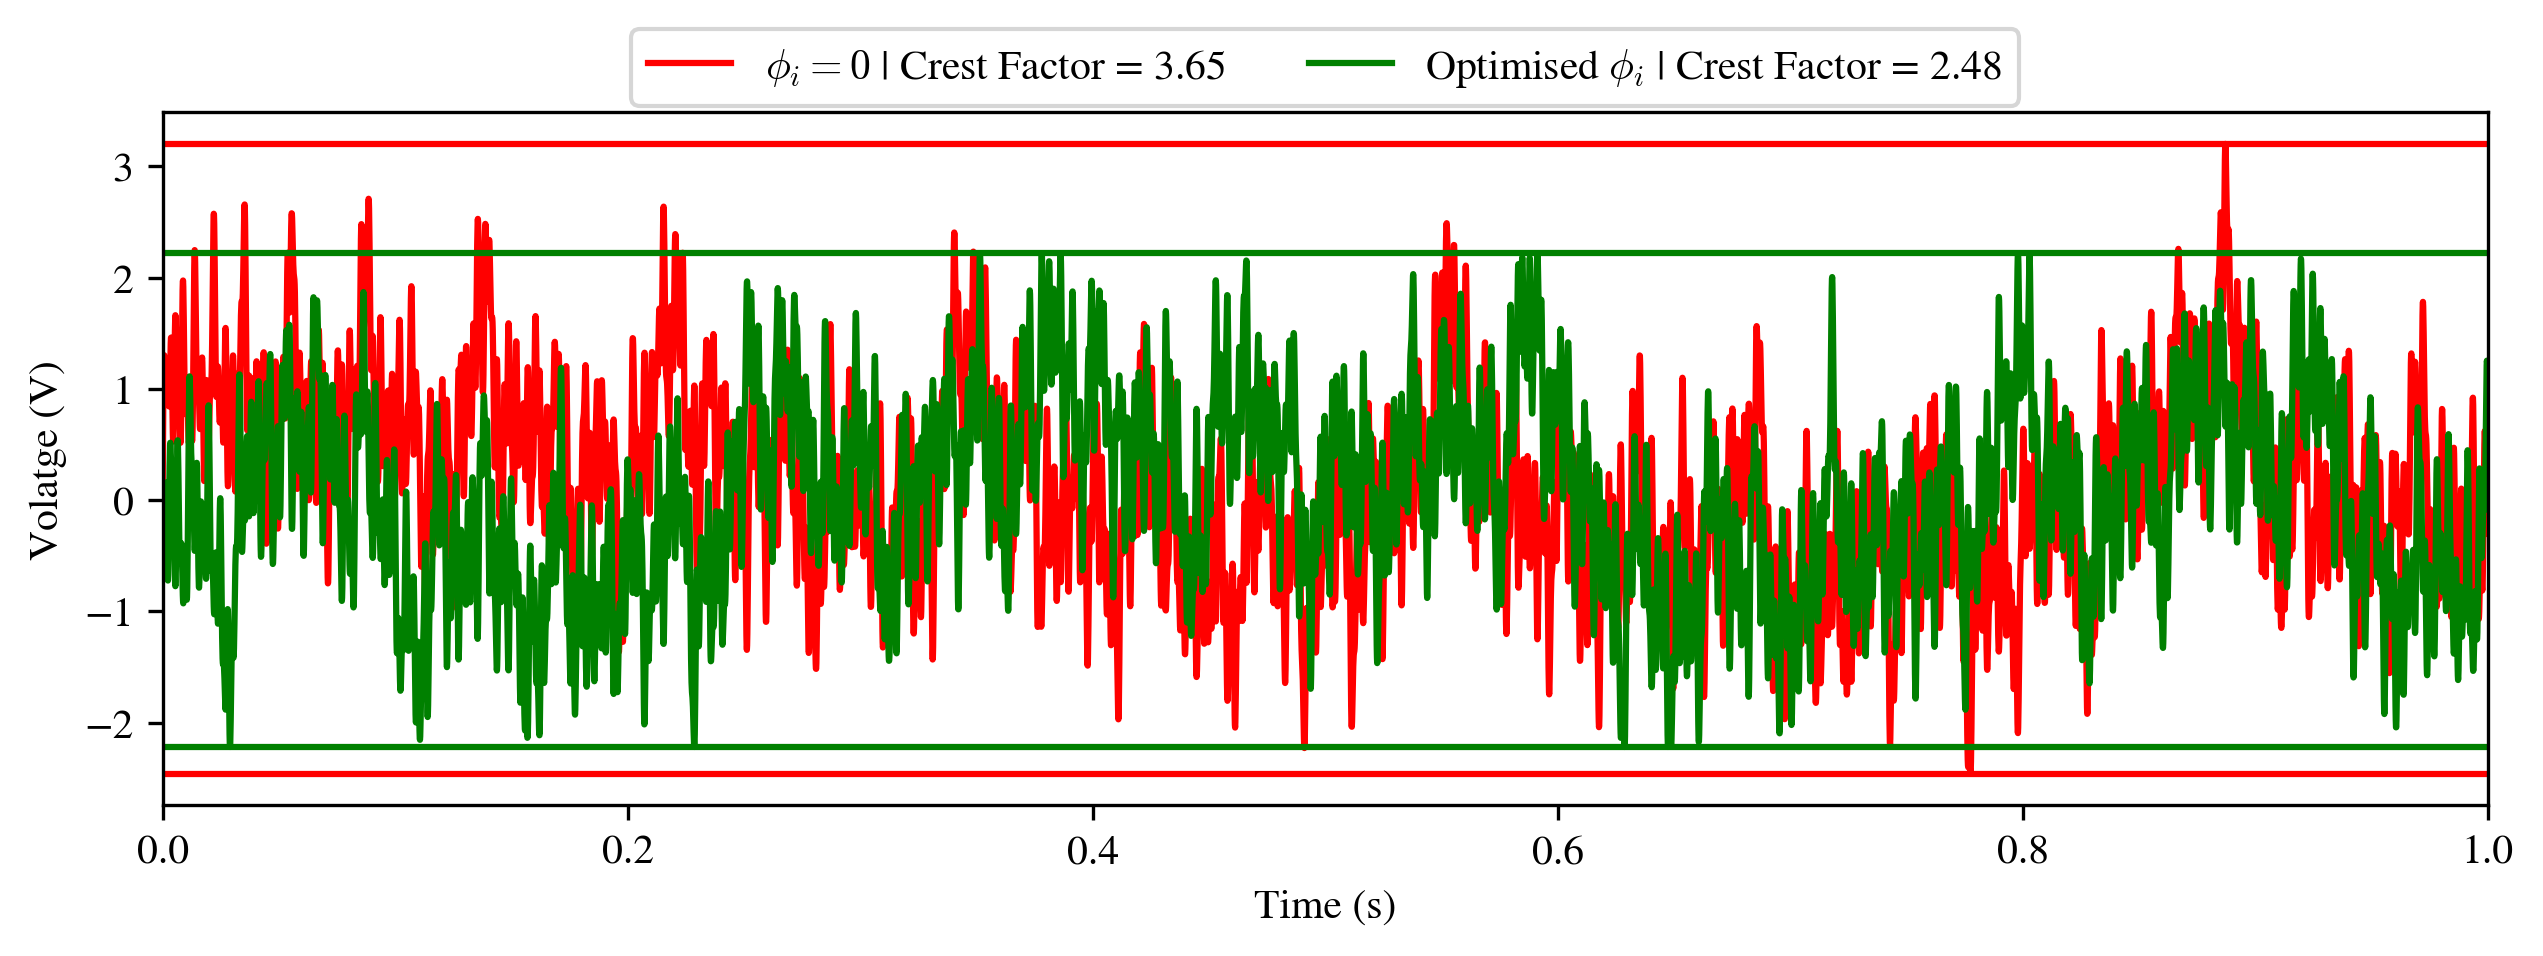

In [35]:
fig, ax1 = plt.subplots(nrows=1,ncols=1, dpi=300, figsize=(10,3))

ax1.plot(time,zero_phase_multisine,label=fr'$\phi_i=0$ | Crest Factor = {crest_factor(zero_phases):.3}', color='red')
ax1.plot(time,opt_multisine, label=fr'Optimised $\phi_i$ | Crest Factor = {SLSQP_optimum_info.fun:.3}', color='green')

# horizontal lines for min and max optimal phase values
ax1.axhline(y=max(opt_multisine), color='green', label=None)
ax1.axhline(y=min(opt_multisine), color='green', label=None)

# horizontal lines for min and max zero phase values
ax1.axhline(y=min(zero_phase_multisine), color='red', label=None)
ax1.axhline(y=max(zero_phase_multisine), color='red', label=None)

ax1.set_ylabel('Volatge (V)')
ax1.set_xlabel('Time (s)')
ax1.set_xlim(0,1)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

In [36]:
print(f'Optimisation resulted in a {100*(crest_factor(zero_phases)-SLSQP_optimum_info.fun) / crest_factor(zero_phases):.4}% reduction in Crest factor')

Optimisation resulted in a 32.05% reduction in Crest factor


In [37]:
(max(zero_phase_multisine) - max(opt_multisine) )/ max(zero_phase_multisine) * 100

30.71039135111399